# Multivariate Project

## Importing the data

In [ ]:
pip install numpy

In [1]:
import pandas as pd
import numpy as np

This is the link to the nba_api information:
https://pypi.org/project/nba_api/


Here is a link to the github repository for the values within the api:

In [2]:
pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.9/284.9 kB 3.2 MB/s eta 0:00:00


This is the link to the streamlit patform:
https://streamlit.io/#install

This will allow us to have an approachable frontend for our values and insights from this project.

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [3]:
%%writefile app.py
#this ^tunnels the app to
import streamlit as st

st.write("An Insight Into Game Outcomes")

Writing app.py


Some useful insights might be discovering patterns of team averages based on when players are played, understanding the scoreboard when certain players are involved (how many 3s, 2s, rebounds etc), understanding public sentiment when certain players are in the game/related to their performance.

predicting game outcomes - using machine learning analysis

player tracking - computer vision to track data and understand what the players are doing

sentiment anaylsis - tweets blog, posts, can look at the sentiments of a player themselves and what this would look like(nltk) - this is what I (Jenna) would like to focus on personally maybe a mix of this and perdicting game outcomes.


In [4]:
import nba_api

This is the link to the endpoints and how to search the api values:
https://github.com/swar/nba_api/blob/master/docs/nba_api/stats/examples.md#endpoint-usage-example

In [5]:
#installing the dataset from nba data - based on base code from the api documentation
from nba_api.stats.static import players

#finding player by their full name
players.find_players_by_full_name('LeBron James')

#you can also find the value by first and last name
players.find_players_by_first_name('LeBron')

#Get all players
players_nba = players.get_players()

#can get all players in the WNBA
players_wnba = players.get_wnba_players() #is_active is a valuable property as well


In [6]:
#getting all of the teams
from nba_api.stats.static import teams

#sets the values for the nba teams as a variable
teams_nba = teams.get_teams()

#sets the values for the wnba teams as a variable
teams_wnba = teams.get_wnba_teams()

In [7]:
#getting career values in the value
from nba_api.stats.endpoints import playercareerstats

#Nikola Jokic
career = playercareerstats.PlayerCareerStats(player_id='203999')
career.get_data_frames()[0]

#json
career.get_json()

#dictionary
career.get_dict()

{'resource': 'playercareerstats',
 'parameters': {'PerMode': 'Totals', 'PlayerID': 203999, 'LeagueID': '00'},
 'resultSets': [{'name': 'SeasonTotalsRegularSeason',
   'headers': ['PLAYER_ID',
    'SEASON_ID',
    'LEAGUE_ID',
    'TEAM_ID',
    'TEAM_ABBREVIATION',
    'PLAYER_AGE',
    'GP',
    'GS',
    'MIN',
    'FGM',
    'FGA',
    'FG_PCT',
    'FG3M',
    'FG3A',
    'FG3_PCT',
    'FTM',
    'FTA',
    'FT_PCT',
    'OREB',
    'DREB',
    'REB',
    'AST',
    'STL',
    'BLK',
    'TOV',
    'PF',
    'PTS'],
   'rowSet': [[203999,
     '2015-16',
     '00',
     1610612743,
     'DEN',
     21.0,
     80,
     55,
     1733,
     307,
     600,
     0.512,
     28,
     84,
     0.333,
     154,
     190,
     0.811,
     181,
     379,
     560,
     189,
     79,
     50,
     104,
     208,
     796],
    [203999,
     '2016-17',
     '00',
     1610612743,
     'DEN',
     22.0,
     73,
     59,
     2038,
     494,
     854,
     0.578,
     45,
     139,
     0.324,

In [8]:
#Get game dates for teams(celtics in example)

from nba_api.stats.endpoints import leaguegamefinder

# Query for games where the Celtics were playing
gamefinder = leaguegamefinder.LeagueGameFinder()
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]
games.head()

#Returns: SEASON_ID,	TEAM_ID,	TEAM_ABBREVIATION,	TEAM_NAME,	GAME_ID,	GAME_DATE,	MATCHUP	WL,	MIN	PTS,	...,	FT_PCT,	OREB,	DREB,	REB,	AST,	STL,	BLK,	TOV,	PF, PLUS_MINUS

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42024,1610612752,NYK,New York Knicks,0042400122,2025-04-21,NYK vs. DET,L,239,94,...,0.842,7,27,34,15,8,1,14,22,-6.0
1,42024,1610612743,DEN,Denver Nuggets,0042400172,2025-04-21,DEN vs. LAC,L,239,102,...,0.636,15,35,50,23,8,1,20,14,-3.0
2,42024,1610612746,LAC,LA Clippers,0042400172,2025-04-21,LAC @ DEN,W,240,105,...,0.833,7,25,32,24,13,5,11,19,3.0
3,42024,1610612765,DET,Detroit Pistons,0042400122,2025-04-21,DET @ NYK,W,239,100,...,0.824,12,36,48,11,7,4,15,24,6.0
4,42024,1610612748,MIA,Miami Heat,0042400101,2025-04-20,MIA @ CLE,L,239,100,...,0.750,11,26,37,23,5,4,14,15,-21.0


In [9]:
teams_nba = teams.get_teams()
teams_by_name = [(teams_nba['id'], teams_nba['full_name']) for teams_nba in teams_nba]
print(teams_nba)
print(teams_by_name)

[{'id': 1610612737, 'full_name': 'Atlanta Hawks', 'abbreviation': 'ATL', 'nickname': 'Hawks', 'city': 'Atlanta', 'state': 'Georgia', 'year_founded': 1949}, {'id': 1610612738, 'full_name': 'Boston Celtics', 'abbreviation': 'BOS', 'nickname': 'Celtics', 'city': 'Boston', 'state': 'Massachusetts', 'year_founded': 1946}, {'id': 1610612739, 'full_name': 'Cleveland Cavaliers', 'abbreviation': 'CLE', 'nickname': 'Cavaliers', 'city': 'Cleveland', 'state': 'Ohio', 'year_founded': 1970}, {'id': 1610612740, 'full_name': 'New Orleans Pelicans', 'abbreviation': 'NOP', 'nickname': 'Pelicans', 'city': 'New Orleans', 'state': 'Louisiana', 'year_founded': 2002}, {'id': 1610612741, 'full_name': 'Chicago Bulls', 'abbreviation': 'CHI', 'nickname': 'Bulls', 'city': 'Chicago', 'state': 'Illinois', 'year_founded': 1966}, {'id': 1610612742, 'full_name': 'Dallas Mavericks', 'abbreviation': 'DAL', 'nickname': 'Mavericks', 'city': 'Dallas', 'state': 'Texas', 'year_founded': 1980}, {'id': 1610612743, 'full_name':

In [10]:

def find_LeagueGameFinder(team_name):
  #Input: full team name as string
  #ex: "Atlanta Hawks"
  #Outputs: SEASON_ID	TEAM_ID	TEAM_ABBREVIATION	TEAM_NAME	GAME_ID	GAME_DATE	MATCHUP	WL	MIN	PTS	...	FT_PCT	OREB	DREB	REB	AST	STL	BLK	TOV	PF	PLUS_MINUS
  # for all games between 2015 and 2024

  #getting lists of all team names and their team id
  teams_nba = teams.get_teams()
  teams_by_name = [(teams_nba['id'], teams_nba['full_name']) for teams_nba in teams_nba]

  #turning the team name into team id
  team_id = teams_by_name['full_name' == team_name][0]

  #Finding game data frames
  gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id)
  games = gamefinder.get_data_frames()[0]

  #turning the season_id from string to a numeric variable
  games['SEASON_ID'] = pd.to_numeric(games['SEASON_ID'] , errors='coerce')

  #creating a range of seasons that we want
  mask = (games['SEASON_ID'] >= 22015) & (games['SEASON_ID'] <= 22024)

  # Apply the mask to filter the DataFrame
  df_trimmed = games[mask]

  return(df_trimmed)

hawks = find_LeagueGameFinder("Atlanta Hawks")
hawks


# Query for games where the Celtics were playing
#gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=celtics_id)
# The first DataFrame of those returned is what we want.
#games = gamefinder.get_data_frames()[0]
#games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
2,22024,1610612737,ATL,Atlanta Hawks,0022401186,2025-04-13,ATL vs. ORL,W,241,117,...,0.600,9,35,44,32,8.0,2,15,15,12.0
3,22024,1610612737,ATL,Atlanta Hawks,0022401173,2025-04-11,ATL @ PHI,W,240,124,...,0.750,18,35,53,28,9.0,5,14,15,14.0
4,22024,1610612737,ATL,Atlanta Hawks,0022401169,2025-04-10,ATL @ BKN,W,238,133,...,0.667,7,44,51,36,11.0,1,15,19,24.0
5,22024,1610612737,ATL,Atlanta Hawks,0022401149,2025-04-08,ATL @ ORL,L,241,112,...,0.818,14,27,41,25,7.0,6,18,26,-7.0
6,22024,1610612737,ATL,Atlanta Hawks,0022401136,2025-04-06,ATL vs. UTA,W,239,147,...,0.850,11,31,42,43,7.0,3,11,19,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,22015,1610612737,ATL,Atlanta Hawks,1521500050,2015-07-16,ATL @ DEN,W,199,82,...,0.714,8,29,37,19,15.0,2,17,22,9.0
946,22015,1610612737,ATL,Atlanta Hawks,1521500039,2015-07-15,ATL vs. MIA,W,200,75,...,0.889,12,32,44,17,7.0,7,20,28,11.0
947,22015,1610612737,ATL,Atlanta Hawks,1521500025,2015-07-13,ATL vs. DLS,L,200,74,...,0.667,7,28,35,10,10.0,6,18,26,-10.0
948,22015,1610612737,ATL,Atlanta Hawks,1521500020,2015-07-12,ATL vs. GSW,W,200,71,...,0.409,2,33,35,12,12.0,12,20,33,1.0


In [ ]:
hawks.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

### PlayerVSPlayer

In [11]:
from nba_api.stats.endpoints import playervsplayer
from nba_api.stats.static import players

#contents = generate_endpoint_contents(playersvsplayers, endpoint_analysis)
#paramter_documentation = get_class_information(playersvsplayers)

In [12]:
def find_player_stats(player_name, player_name2):
  #finding and getting player ids
  player_1 = players.find_players_by_full_name(player_name)
  player_2 = players.find_players_by_full_name(player_name2)

  #getting the player ids
  player1_id = player_1[0]['id']
  player2_id = player_2[0]['id']

  #head to head statistics
  stats = playervsplayer.PlayerVsPlayer(player_id=player1_id, vs_player_id=player2_id,)
  #stats.get_data_frames(
  data = stats.get_data_frames()[0]
  return(data)

In [ ]:
find_player_stats("LeBron James", "Stephen Curry")

NameError: name 'on_off_court' is not defined

Taking the values from the interface as initial values and then determining for each value the faceoff between the individual players.

Looking at the values of the entire player dataset and the relative values

## Box Score Player Track

In [13]:
from nba_api.stats.endpoints import boxscoreplayertrackv2

def get_box_score_player_track(player_name):
  data = get_box_score_track(player_name)
  player_individual = data[data['PLAYER_NAME'] == player_name]
  return(player_individual)


In [14]:
team_name = "Houston Rockets"
team = [team for team in teams_nba if team['full_name'] == team_name]
team_id = team[0]['id']

gamefiinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id)
gamefinder2 = leaguegamefinder.LeagueGameFinder(vs_team_id_nullable=team_id)
games = gamefiinder.get_data_frames()[0]
games2 = gamefinder2.get_data_frames()[0]

#getting the latest - comparing the two above values
latest_game_id = games.iloc[0]['GAME_ID']
print(latest_game_id)

0042400151


In [15]:
  team = [team for team in teams_nba if team['full_name'] == team_name1]
  team_id = team[0]['id']


  team_vs = [team for team in teams_nba if team['full_name'] == team_name2]
  team_id2 = team[0]['id']

  gamefiinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id, vs_team_id_nullable=team_id2)
  games = gamefiinder.get_data_frames()[0]
  games2 = gamefinder2.get_data_frames()[0]

  #getting the latest - comparing the two above values
  print(games)
  latest_game_id = games.iloc[0]['GAME_ID']
  latest_game_id2 = games2.iloc[0]['GAME_ID']
  if latest_game_id > latest_game_id2:
    latest_game_id = latest_game_id
  else:
    latest_game_id = latest_game_id2
  #display the player tracking stats
  player_tracking = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=latest_game_id)
  data = player_tracking.get_data_frames()[0]
  return(data)

NameError: name 'team_name1' is not defined

In [ ]:
  team_name1 = "Los Angeles Lakers"
  team_name2 = "Dallas Mavericks"
  team = [team for team in teams_nba if team['full_name'] == team_name1]
  team_id = team[0]['id']


  team_vs = [team for team in teams_nba if team['full_name'] == team_name2]
  team_id2 = team[0]['id']


  gamefiinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id, vs_team_id_nullable=team_id2)
  gamefinder2 = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id2, vs_team_id_nullable=team_id)
  games = gamefiinder.get_data_frames()
  games2 = gamefinder2.get_data_frames()
  games

[Empty DataFrame
 Columns: [SEASON_ID, TEAM_ID, TEAM_ABBREVIATION, TEAM_NAME, GAME_ID, GAME_DATE, MATCHUP, WL, MIN, PTS, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FTA, FT_PCT, OREB, DREB, REB, AST, STL, BLK, TOV, PF, PLUS_MINUS]
 Index: []
 
 [0 rows x 28 columns]]

In [ ]:
def get_box_score_track(team_name):
  team = [team for team in teams_nba if team['full_name'] == team_name]
  team_id = team[0]['id']

  gamefiinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id)
  gamefinder2 = leaguegamefinder.LeagueGameFinder(vs_team_id_nullable=team_id)
  games = gamefiinder.get_data_frames()[0]
  games2 = gamefinder2.get_data_frames()[0]

  #getting the latest - comparing the two above values
  latest_game_id = games.iloc[0]['GAME_ID']
  latest_game_id2 = games2.iloc[0]['GAME_ID']
  if latest_game_id > latest_game_id2:
    latest_game_id = latest_game_id
  else:
    latest_game_id = latest_game_id2
  #display the player tracking stats
  player_tracking = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=latest_game_id)
  data = player_tracking.get_data_frames()[0]
  return(data)

In [ ]:
def get_box_score_track_teamvteam(team_name1, team_name2):
  team = [team for team in teams_nba if team['full_name'] == team_name1]
  team_id = team[0]['id']


  team_vs = [team for team in teams_nba if team['full_name'] == team_name2]
  team_id2 = team_vs[0]['abbreviation']


  gamefiinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id)
  games = gamefiinder.get_data_frames()[0]



  games_against = games[games['MATCHUP'].str.contains(team_id2)]
  latest_game = games_against.sort_values(by='GAME_DATE', ascending=False).iloc[0]
  latest_game_id = latest_game['GAME_ID']
  #display the player tracking stats
  player_tracking = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=latest_game_id)
  data = player_tracking.get_data_frames()[0]
  return(data)

In [ ]:
get_box_score_track_teamvteam("Houston Rockets", "Atlanta Hawks")

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,SPD,...,CFGM,CFGA,CFG_PCT,UFGM,UFGA,UFG_PCT,FG_PCT,DFGM,DFGA,DFG_PCT
0,0022401049,1610612737,ATL,Atlanta,1642258,Zaccharie Risacher,F,,23:44,4.67,...,5,6,0.833,3,10,0.300,0.500,1,2,0.500
1,0022401049,1610612737,ATL,Atlanta,1631243,Mouhamed Gueye,F,,8:38,4.83,...,0,1,0.000,0,2,0.000,0.000,1,1,1.000
2,0022401049,1610612737,ATL,Atlanta,1630168,Onyeka Okongwu,C,,38:24,4.03,...,2,7,0.286,4,7,0.571,0.428,3,5,0.600
3,0022401049,1610612737,ATL,Atlanta,1630700,Dyson Daniels,G,,36:01,4.38,...,1,4,0.250,6,10,0.600,0.500,1,2,0.500
4,0022401049,1610612737,ATL,Atlanta,1629027,Trae Young,G,,39:01,3.86,...,0,7,0.000,7,10,0.700,0.411,2,2,1.000
5,0022401049,1610612737,ATL,Atlanta,1627777,Georges Niang,,,22:10,4.17,...,0,2,0.000,4,7,0.571,0.444,4,4,1.000
6,0022401049,1610612737,ATL,Atlanta,1627747,Caris LeVert,,,19:38,3.99,...,0,1,0.000,2,8,0.250,0.222,0,0,0.000
7,0022401049,1610612737,ATL,Atlanta,1629611,Terance Mann,,,24:30,4.01,...,3,4,0.750,4,8,0.500,0.582,2,2,1.000
8,0022401049,1610612737,ATL,Atlanta,1631230,Dominick Barlow,,,9:36,4.19,...,1,2,0.500,0,2,0.000,0.250,2,3,0.667
9,0022401049,1610612737,ATL,Atlanta,1630249,Vít Krejčí,,,11:51,3.96,...,0,0,0.000,1,2,0.500,0.500,2,3,0.667


In [ ]:
def get_team_id(team_name):
  team = [team for team in teams_nba if team['full_name'] == team_name]
  team_id = team[0]['id']
  return(team_id)

In [ ]:
def get_box_score_starters(team_name):
  data = get_box_score_track(team_name)
  team_id = get_team_id(team_name)
  starters = data[data['START_POSITION'] != ""]
  starters = starters[starters['TEAM_ID'] == team_id]
  return(starters)

In [ ]:
get_box_score_starters("Houston Rockets")

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,SPD,...,CFGM,CFGA,CFG_PCT,UFGM,UFGA,UFG_PCT,FG_PCT,DFGM,DFGA,DFG_PCT
15,0042400151,1610612745,HOU,Houston,1628415,Dillon Brooks,F,,33:59,3.95,...,0,2,0.000,3,7,0.429,0.333,3,4,0.750
16,0042400151,1610612745,HOU,Houston,1641708,Amen Thompson,F,,33:24,4.18,...,2,6,0.333,2,3,0.667,0.444,2,2,1.000
17,0042400151,1610612745,HOU,Houston,1630578,Alperen Sengun,C,,35:53,3.98,...,8,11,0.727,3,7,0.429,0.610,0,1,0.000
18,0042400151,1610612745,HOU,Houston,1630224,Jalen Green,G,,30:33,4.32,...,3,9,0.333,0,6,0.000,0.200,2,3,0.667
19,0042400151,1610612745,HOU,Houston,1627832,Fred VanVleet,G,,40:22,3.90,...,0,3,0.000,4,16,0.250,0.210,1,3,0.333


In [ ]:
get_box_score_player_track("LeBron James")

In [ ]:
import pandas as pd
#fitting a prediction model based on who the players are and their information relative to each other
def teams_starting_faceoff(team1, team2):
  pvp = pd.DataFrame()
  a = get_box_score_track_teamvteam(team1, team2)
  team_id1 = get_team_id(team1)
  team_id2 = get_team_id(team2)
  #getting the values of the starters on team1
  starters_a = a[(a['START_POSITION'] != "")  &(a['TEAM_ID'] == team_id1)]
  players_a = starters_a['PLAYER_NAME']
  print(players_a)
  #getting the values of the starters on team2
  b = get_box_score_starters(team2)
  starters_b = b[(b['START_POSITION'] != "")  &(b['TEAM_ID'] == team_id2)]
  print(starters_b)
  players_b = starters_b['PLAYER_NAME']
  for i in players_a:
    for j in players_b:
      players = find_player_stats(i, j)
      print(players)
      pvp = pvp.append(players)
  return(pvp)




In [ ]:
#this is testing the above lines of code to make sure that they work
teams_starting_faceoff("Houston Rockets","Atlanta Hawks")

12        Tari Eason
13     Dillon Brooks
14    Alperen Sengun
15       Jalen Green
16     Fred VanVleet
Name: PLAYER_NAME, dtype: object
       GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
15  0052400201  1610612737               ATL   Atlanta    1642258   
16  0052400201  1610612737               ATL   Atlanta    1631243   
17  0052400201  1610612737               ATL   Atlanta    1630168   
18  0052400201  1610612737               ATL   Atlanta    1630700   
19  0052400201  1610612737               ATL   Atlanta    1629027   

           PLAYER_NAME START_POSITION COMMENT    MIN   SPD  ...  CFGM  CFGA  \
15  Zaccharie Risacher              F          15:39  4.79  ...     1     3   
16      Mouhamed Gueye              F          14:55  4.86  ...     0     1   
17      Onyeka Okongwu              C          49:34  3.95  ...     5     7   
18       Dyson Daniels              G          44:25  4.32  ...     2     8   
19          Trae Young              G          44:09

AttributeError: 'DataFrame' object has no attribute 'append'


to get player vs player stats: class PlayerVsPlayer(Endpoint)

boxscoreplayertrack - pairwise plot variance

League Game Finder - Max - pairwise, vars-cov-matrix.

# PCA Linear Model

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def helper_linear_model_with_pca(df, target_column, n_components=None, test_size=0.2, random_state=42, var_threshold = 0.8):
    """
    Performs linear regression with PCA on a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target variable column.
        n_components (int, optional): Number of principal components to retain.
                                       If None, all components are used. Defaults to None.
        test_size (float, optional): Proportion of the data for testing. Defaults to 0.2.
        random_state (int, optional): Random seed for reproducibility. Defaults to 42.
        var_threshold (float, optional): Proportion of variance to be explained by the PCA components. Defaults to 0.8.

    Returns:
        tuple: A tuple containing the fitted LinearRegression model, PCA object,
               and the mean squared error on the test set.
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

    # Apply PCA
    pca_testing = PCA()
    pca_testing.fit_transform(X_train)
    if n_components is None:
      n_components = add_elements_until_threshold(pca_testing.explained_variance_ratio_, threshold=var_threshold)

    pca = PCA(n_components=n_components)

    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train_pca, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_pca)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)


    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(pca_testing.explained_variance_ratio_) + 1), np.cumsum(pca_testing.explained_variance_ratio_), 'go-', markersize=6)
    plt.title('Cumulative Proportion of Variance Explained')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Proportion of Variance Explained')
    plt.grid(True)
    plt.show()
    print("Number of PCA components to explain", var_threshold, "variance:",n_components)

    return model, pca, mse, y_test, y_pred
def df_remove_nan_rows(df, how='any', subset=None, inplace=False):
    """
    Removes rows with NaN values from a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to remove NaN values from.
        how (str, optional): Determines if rows are removed when any or all values are NaN.
                             {'any', 'all'}, default 'any'.
        subset (list-like, optional): List of columns to consider when removing NaN values.
        inplace (bool, optional): If True, modify the DataFrame in place. Default is False.

    Returns:
        pd.DataFrame: A new DataFrame with NaN values removed or None if inplace=True.
    """
    return df.dropna(how=how, subset=subset, inplace=inplace)
def df_get_last_three_chars(df, column_name, new_column_name):
    """
    Extracts the last three characters from a specified string column in a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column containing strings.
        new_column_name (str): The name of the new column to store the extracted characters.

    Returns:
        pd.DataFrame: The DataFrame with the new column containing the last three characters.
    """
    df[new_column_name] = df[column_name].str[-3:]
    return df
def add_elements_until_threshold(array, threshold):
  """
  Adds elements from a NumPy array until the cumulative sum reaches a specified threshold.

  Args:
    array: A NumPy array of numerical values.
    threshold: The target cumulative sum.

  Returns:
    The amount of variables needed to get to that threshold
  """
  cumulative_sum = 0
  result_array = []
  count = 0

  for i, element in enumerate(array):
    count = count+1
    cumulative_sum += element
    result_array.append(element)

    if cumulative_sum >= threshold:
      return (count)

  return (count)

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



def linear_model_with_pca(df, target_column, n_components=None, test_size=0.2, random_state=42, var_threshold = 0.8):
    """
    Performs linear regression with PCA on a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target variable column.
        n_components (int, optional): Number of principal components to retain.
                                       If None, uses number of components needed to surpass varaince threshold.
        test_size (float, optional): Proportion of the data for testing. Defaults to 0.2.
        random_state (int, optional): Random seed for reproducibility. Defaults to 42.
        var_threshold (float, optional): Proportion of variance to be explained by the PCA components. Defaults to

        Returns:
        tuple: A tuple containing the fitted LinearRegression model, PCA object,
               and the mean squared error on the test set.
    """
    #Drop nan values

    data = df_remove_nan_rows(df)

    #Getting opposing team
    data = df_get_last_three_chars(data, 'MATCHUP', 'MATCHUP_LAST_THREE')

    #factorizing WL and Matchup
    data['WL'], uniques_WL = pd.factorize(data['WL'])
    data['MATCHUP_LAST_THREE'], uniques_MATCHUP = pd.factorize(data['MATCHUP_LAST_THREE'])

    data_numeric_df = data.select_dtypes(include=np.number)

    model, pca, mse, y_test, y_pred = helper_linear_model_with_pca(data_numeric_df, target_column,
                                                                                 n_components=n_components, test_size=test_size,
                                                                                 random_state=random_state, var_threshold = var_threshold)
    print("PCA1 MSE:", mse)
    print("PCA1:", pca)
    print("PCA1 model:", model)
    print("PCA1 model coef:", model.coef_)
    #R squared score
    r_squared = r2_score(y_test, y_pred)
    print("PCA1 R2:", r2_score(y_test, y_pred))
    #return(r_squared, model, pca, mse, y_test, y_pred, )


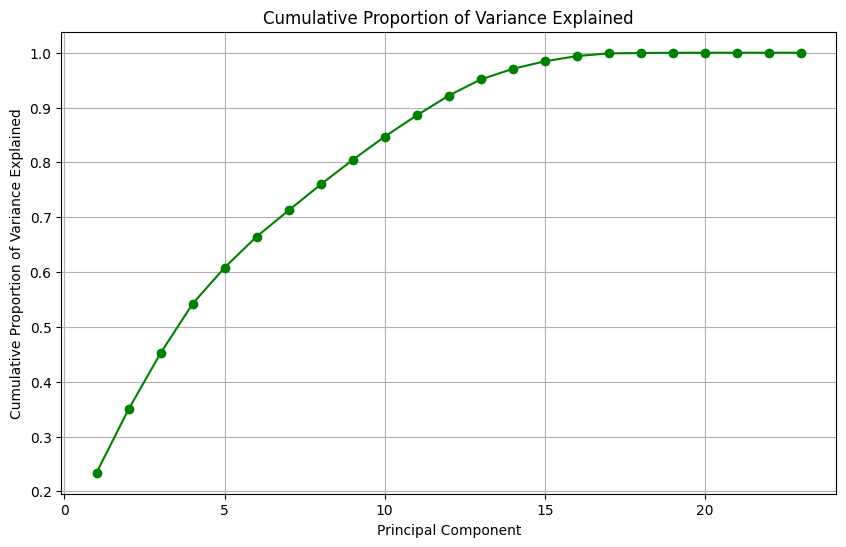

Number of PCA components to explain 0.8 variance: 9
PCA1 MSE: 0.1160320823013934
PCA1: PCA(n_components=9)
PCA1 model: LinearRegression()
PCA1 model coef: [-0.10404575  0.0441542  -0.04941199 -0.16236364  0.0716556   0.04531394
  0.15293703 -0.00693283  0.02877721]
PCA1 R2: 0.5519338350467304


In [ ]:
hawks_dropped = hawks.dropna()
linear_model_with_pca(hawks_dropped, 'WL')

# SVM using PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def df_remove_nan_rows(df, how='any', subset=None, inplace=False):
    #Seeing if there are missing values in WL col
    index_to_drop = df[df['WL'] == " "].index
    # Drop the rows with the found index
    df_dropped = df.drop(index_to_drop)
    return df_dropped.dropna(how=how, subset=subset, inplace=inplace)

def df_get_last_three_chars(df, column_name, new_column_name):
    df[new_column_name] = df[column_name].str[-3:]
    return df

def add_elements_until_threshold(array, threshold):
    cumulative_sum = 0
    count = 0
    for element in array:
        cumulative_sum += element
        count += 1
        if cumulative_sum >= threshold:
            return count
    return count

def helper_svm_model_with_pca(df, target_column, n_components=None, test_size=0.2, random_state=42, var_threshold=0.8):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

    # Determine number of PCA components
    pca_testing = PCA()
    pca_testing.fit(X_train)
    if n_components is None:
        n_components = add_elements_until_threshold(pca_testing.explained_variance_ratio_, var_threshold)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train SVM classifier
    model = SVC()
    model.fit(X_train_pca, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    # Variance plot
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(pca_testing.explained_variance_ratio_) + 1),
             np.cumsum(pca_testing.explained_variance_ratio_),
             'go-', markersize=6)
    plt.title('Cumulative Proportion of Variance Explained')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Proportion of Variance Explained')
    plt.grid(True)
    plt.show()
    print("Number of PCA components to explain", var_threshold, "variance:", n_components)

    return model, pca, accuracy, y_test, y_pred


In [ ]:

def svm_model_with_pca(df, target_column='WL', n_components=None, test_size=0.2, random_state=42, var_threshold=0.8):
    data = df_remove_nan_rows(df)

    # Extract team info from 'MATCHUP'
    data = df_get_last_three_chars(data, 'MATCHUP', 'MATCHUP_LAST_THREE')

    # Convert WL column to -1/1
    data['WL'] = data['WL'].map({'W': 1, 'L': -1})
    if data['WL'].isnull().any():
        raise ValueError("Unexpected values found in 'WL' column. Only 'W' and 'L' expected.")

    # Factorize categorical features
    data['MATCHUP_LAST_THREE'], _ = pd.factorize(data['MATCHUP_LAST_THREE'])

    # Select numeric data only
    data_numeric_df = data.select_dtypes(include=np.number)

    model, pca, accuracy, y_test, y_pred = helper_svm_model_with_pca(
        data_numeric_df, target_column,
        n_components=n_components, test_size=test_size,
        random_state=random_state, var_threshold=var_threshold
    )

    print("PCA SVM Accuracy:", accuracy)
    print("Confusion Matrix:\n Predicted->Positive(PP), Negative(PN) \n true Positive (P):", confusion_matrix(y_test, y_pred)[0,],
          "\n true Negative (N):", confusion_matrix(y_test, y_pred)[1,], "\n\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    #return model, pca, accuracy, y_test, y_pred


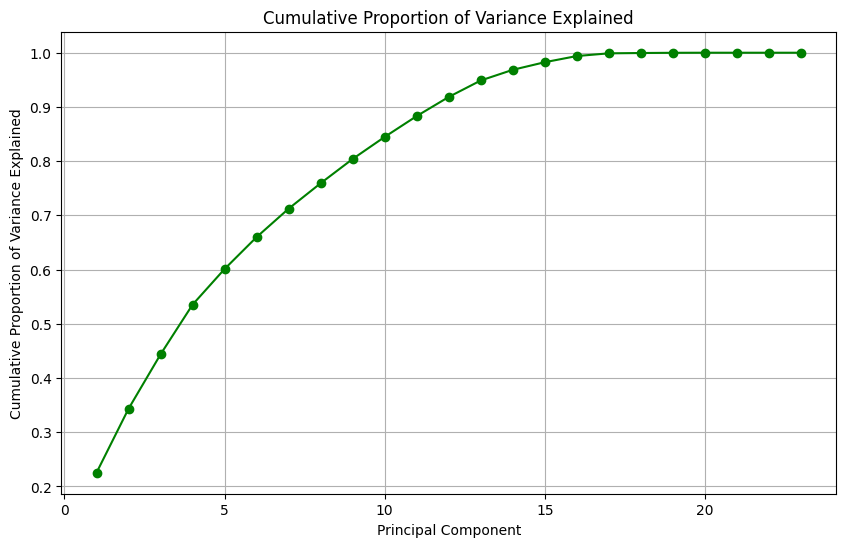

Number of PCA components to explain 0.8 variance: 9
PCA SVM Accuracy: 0.8294117647058824
Confusion Matrix:
 Predicted->Positive(PP), Negative(PN) 
 true Positive (P): [79 13] 
 true Negative (N): [16 62] 

 [[79 13]
 [16 62]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.83      0.86      0.84        92
           1       0.83      0.79      0.81        78

    accuracy                           0.83       170
   macro avg       0.83      0.83      0.83       170
weighted avg       0.83      0.83      0.83       170



In [ ]:
svm_model_with_pca(hawks_dropped)

# SVM using FA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

def df_remove_nan_rows(df, how='any', subset=None, inplace=False):
    #Seeing if there are missing values in WL col
    index_to_drop = df[df['WL'] == " "].index
    # Drop the rows with the found index
    df_dropped = df.drop(index_to_drop)
    return df_dropped.dropna(how=how, subset=subset, inplace=inplace)

def df_get_last_three_chars(df, column_name, new_column_name):
    df[new_column_name] = df[column_name].str[-3:]
    return df

def helper_svm_model_with_factor_analysis(df, target_column, n_components=None, test_size=0.2, random_state=42, var_threshold=0.8):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)


    fa_testing = FactorAnalysis(n_components=n_components, random_state=0)
    # Fit the model to the data
    fa_testing.fit(X_train)

    components = fa_testing.components_
    noise_variance = fa_testing.noise_variance_

    # Square the components matrix
    squared_components = np.square(components)

    # Sum the columns of the squared matrix
    sum_of_squared_components = np.sum(squared_components, axis=0)

    # Calculate the ratio of variance explained
    total_variance = np.sum(sum_of_squared_components) + noise_variance
    variance_explained_percentage = (sum_of_squared_components / total_variance)

    print(f"Variance explained by each factor: {variance_explained_percentage}")

    #Finding how many components need to explain variance at threshold
    if n_components is None:
        n_components = add_elements_until_threshold(variance_explained_percentage, var_threshold)

    # Apply Factor Analysis
    fa = FactorAnalysis(n_components=n_components, random_state=random_state)
    X_train_fa = fa.fit_transform(X_train)
    X_test_fa = fa.transform(X_test)

    # Train SVM classifier
    model = SVC()
    model.fit(X_train_fa, y_train)



    # Variance plot
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(variance_explained_percentage) + 1),
             np.cumsum(variance_explained_percentage),
             'go-', markersize=6)
    plt.title('Cumulative Proportion of Variance Explained')
    plt.xlabel('FA Component')
    plt.ylabel('Cumulative Proportion of Variance Explained')
    plt.grid(True)
    plt.show()
    print("Number of FA components to explain", var_threshold, "variance:", n_components)

    # Predict and evaluate
    y_pred = model.predict(X_test_fa)
    accuracy = accuracy_score(y_test, y_pred)

    return model, fa, accuracy, y_test, y_pred


In [ ]:
def svm_model_with_factor_analysis(df, target_column='WL', n_components=None, test_size=0.2, random_state=42):
    data = df_remove_nan_rows(df)

    # Extract team info from 'MATCHUP'
    data = df_get_last_three_chars(data, 'MATCHUP', 'MATCHUP_LAST_THREE')

    # Convert WL column to -1/1
    data['WL'] = data['WL'].map({'W': 1, 'L': -1})
    if data['WL'].isnull().any():
        raise ValueError("Unexpected values found in 'WL' column. Only 'W' and 'L' expected.")

    # Factorize categorical features
    data['MATCHUP_LAST_THREE'], _ = pd.factorize(data['MATCHUP_LAST_THREE'])

    # Select numeric data only
    data_numeric_df = data.select_dtypes(include=np.number)

    model, fa, accuracy, y_test, y_pred = helper_svm_model_with_factor_analysis(
        data_numeric_df, target_column,
        n_components=n_components, test_size=test_size,
        random_state=random_state
    )


    print("Factor Analysis SVM Accuracy:", accuracy)
    print("Confusion Matrix:\n Predicted->Positive(PP), Negative(PN) \n true Positive (P):", confusion_matrix(y_test, y_pred)[0,],
          "\n true Negative (N):", confusion_matrix(y_test, y_pred)[1,], "\n\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    #return model, fa, accuracy, y_test, y_pred


Variance explained by each factor: [3.30871469e-02 1.79573090e-43 3.86098571e-02 5.72318553e-02
 5.72448014e-02 5.33416010e-02 5.66717480e-02 5.79338969e-02
 5.31079890e-02 5.42262091e-02 5.95079120e-02 5.89987811e-02
 4.51570136e-02 5.19591617e-02 5.74354781e-02 5.51976393e-02
 3.62390511e-02 3.24188470e-02 8.12863560e-03 4.16957263e-02
 2.30864760e-02 5.01514739e-02 8.33000983e-03]


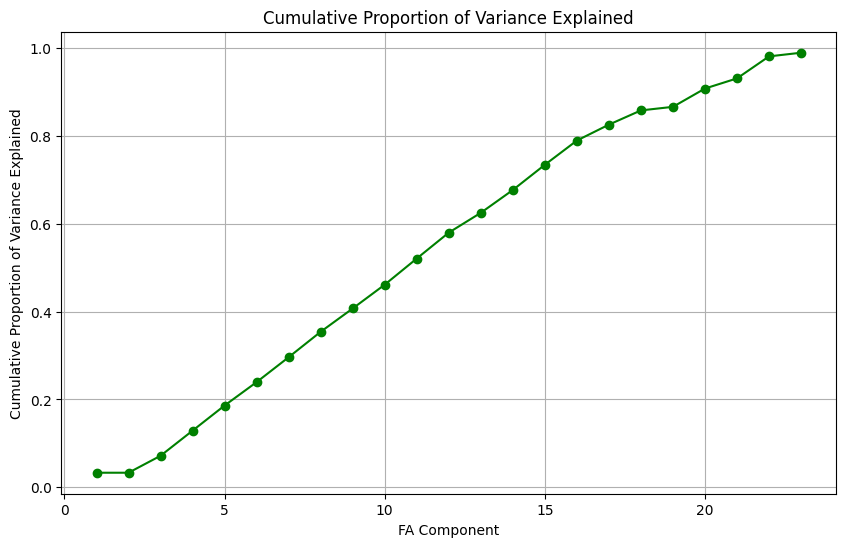

Number of FA components to explain 0.8 variance: 17
Factor Analysis SVM Accuracy: 0.9470588235294117
Confusion Matrix:
 Predicted->Positive(PP), Negative(PN) 
 true Positive (P): [88  4] 
 true Negative (N): [ 5 73] 

 [[88  4]
 [ 5 73]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.96      0.95        92
           1       0.95      0.94      0.94        78

    accuracy                           0.95       170
   macro avg       0.95      0.95      0.95       170
weighted avg       0.95      0.95      0.95       170



In [ ]:
#hawks_dropped = hawks.drop(columns=['PLUS_MINUS','GAME_ID'])
svm_model_with_factor_analysis(hawks_dropped, target_column='WL')

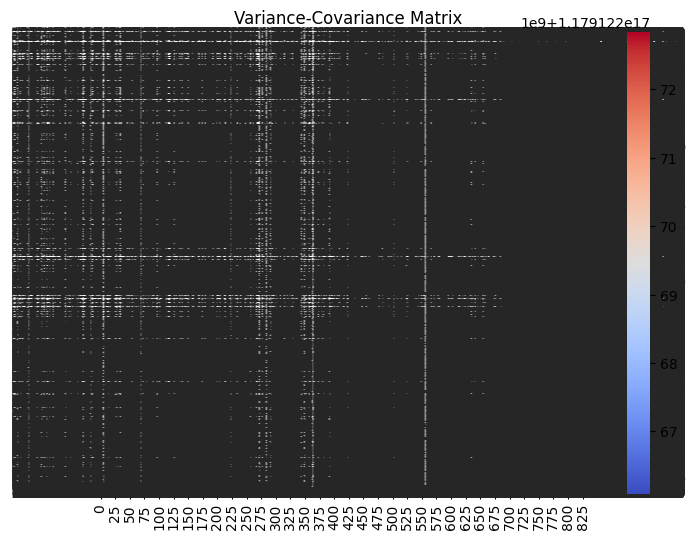

In [16]:
#variane covariance matrix

import matplotlib.pyplot as plt
import seaborn as sns


hawks_numeric_df = hawks.select_dtypes(include=np.number)
hawks_cov = np.cov(hawks_numeric_df)

plt.figure(figsize=(8, 6))
sns.heatmap(hawks_cov, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Variance-Covariance Matrix')
plt.show()

To do the semantic analysis, I believe that taking this list of nba twitter accounts and scraping twitter will allow us to match time of games.

This is the basketball twitter accounts of all of the players:
https://www.basketball-reference.com/friv/twitter.html

This is the list of the games for the 2024-2025 season and the times:
https://www.basketball-reference.com/leagues/NBA_2025_games

To get the tweets of nba players:


In [ ]:
#getting the twitter accounts of the basketball teams
#converted basketball twitter accounts to rtf from basketball reference site


## Random Forest Classifier and LDA Classifier


In [ ]:
pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.9/284.9 kB 4.4 MB/s eta 0:00:00



LDA Results:
Accuracy: 0.8760162601626016
Confusion Matrix:
 [[215  31]
 [ 30 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       246
           1       0.87      0.88      0.88       246

    accuracy                           0.88       492
   macro avg       0.88      0.88      0.88       492
weighted avg       0.88      0.88      0.88       492


Random Forest Results:
Accuracy: 0.8434959349593496
Confusion Matrix:
 [[205  41]
 [ 36 210]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       246
           1       0.84      0.85      0.85       246

    accuracy                           0.84       492
   macro avg       0.84      0.84      0.84       492
weighted avg       0.84      0.84      0.84       492



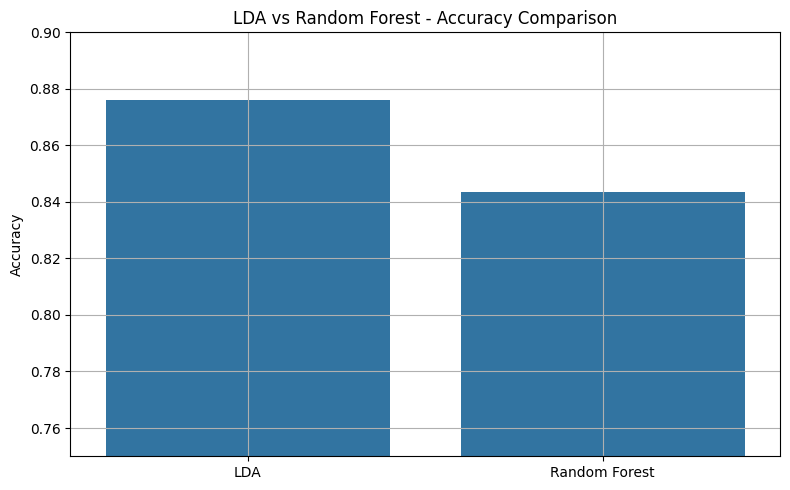

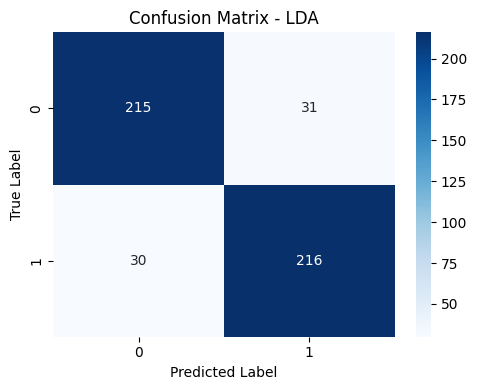

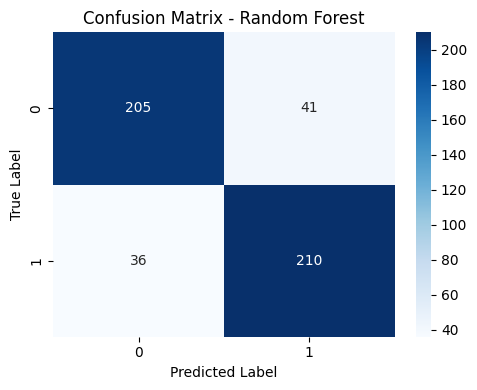

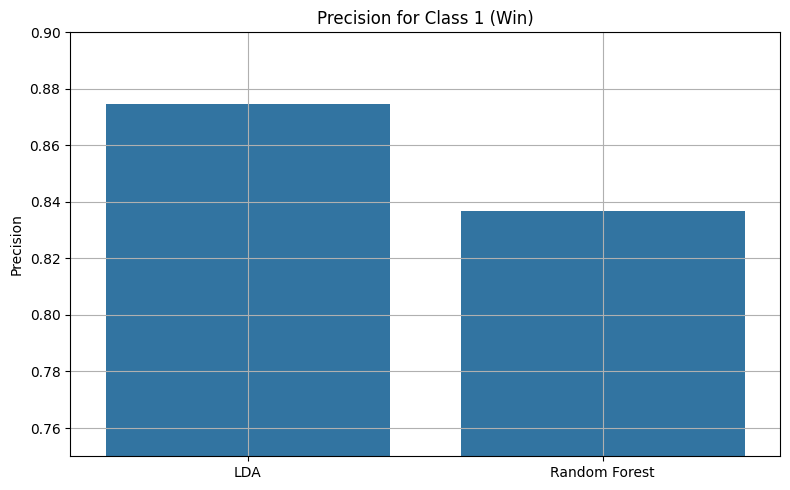

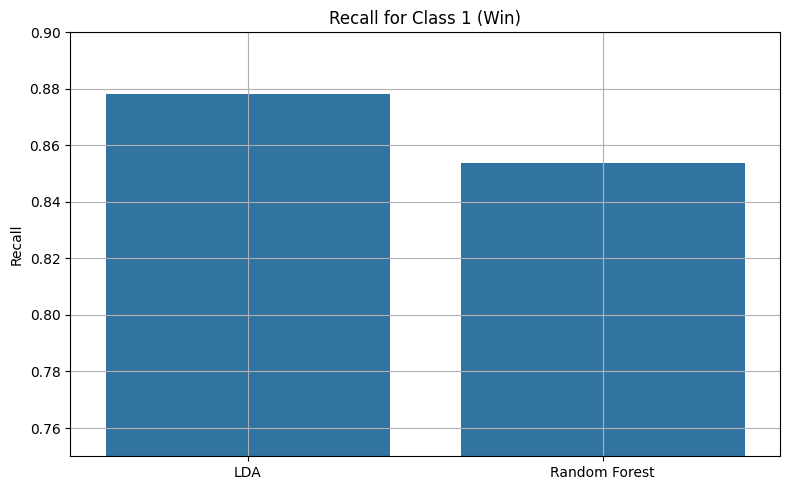

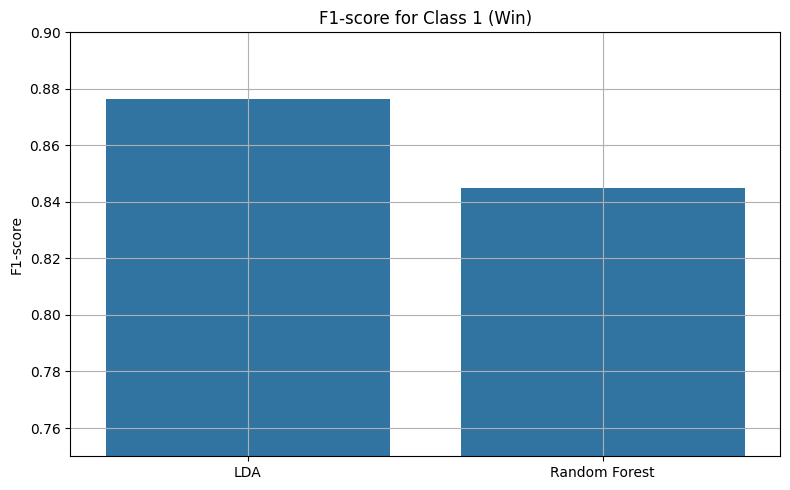

In [ ]:
import pandas as pd
import numpy as np
from nba_api.stats.endpoints import leaguegamelog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

time.sleep(1)
gamelog = leaguegamelog.LeagueGameLog(season='2023-24', player_or_team_abbreviation='T')
df = gamelog.get_data_frames()[0]

df['WIN'] = df['WL'].map({'W': 1, 'L': 0})
features = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
X = df[features]
y = df['WIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lda = LinearDiscriminantAnalysis()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

lda.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

models = {'LDA': lda, 'Random Forest': rf}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'conf_matrix': confusion_matrix(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True)
    }


plt.figure(figsize=(8, 5))
accuracies = [results[name]['accuracy'] for name in models]
sns.barplot(x=list(models.keys()), y=accuracies)
plt.title('LDA vs Random Forest - Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.75, 0.9)
plt.grid(True)
plt.tight_layout()
plt.show()

for name in models:
    plt.figure(figsize=(5, 4))
    sns.heatmap(results[name]['conf_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    scores = [results[name]['report']['1'][metric] for name in models]
    sns.barplot(x=list(models.keys()), y=scores)
    plt.title(f'{metric.capitalize()} for Class 1 (Win)')
    plt.ylabel(metric.capitalize())
    plt.ylim(0.75, 0.9)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from nba_api.stats.endpoints import leaguegamelog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time

time.sleep(1)
gamelog = leaguegamelog.LeagueGameLog(season='2023-24', player_or_team_abbreviation='T')
df = gamelog.get_data_frames()[0]

df['WIN'] = df['WL'].map({'W': 1, 'L': 0})
features = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
X = df[features]
y = df['WIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lda = LinearDiscriminantAnalysis()
svm = SVC(kernel='rbf', probability=True, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

lda.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)

voting_clf = VotingClassifier(estimators=[
    ('lda', lda),
    ('svm', svm),
    ('rf', rf),
    ('gb', gb)
], voting='soft')

voting_clf.fit(X_train_scaled, y_train)

models = {'LDA': lda, 'SVM': svm, 'Random Forest': rf, 'Gradient Boosting': gb, 'Voting Ensemble': voting_clf}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



LDA Results:
Accuracy: 0.8861788617886179
Confusion Matrix:
 [[218  28]
 [ 28 218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       246
           1       0.89      0.89      0.89       246

    accuracy                           0.89       492
   macro avg       0.89      0.89      0.89       492
weighted avg       0.89      0.89      0.89       492


SVM Results:
Accuracy: 0.8739837398373984
Confusion Matrix:
 [[216  30]
 [ 32 214]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       246
           1       0.88      0.87      0.87       246

    accuracy                           0.87       492
   macro avg       0.87      0.87      0.87       492
weighted avg       0.87      0.87      0.87       492


Random Forest Results:
Accuracy: 0.8455284552845529
Confusion Matrix:
 [[213  33]
 [ 43 203]]
Classification Report:
          

In [ ]:
#Looking at the Linear Classifiers - Ridge and Lasso Accuracy of the Variables
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#defined Ridge Regression Model and Lasso Model
ridgeReg = Ridge(alpha = 0.01)
lassoReg = Lasso(alpha = 0.01)
linearReg = LinearRegression()

#the Ridge Regrression and Lasso Regression
linearReg.fit(X_train_scaled, y_train)
ridgeReg.fit(X_train_scaled, y_train)
lassoReg.fit(X_train_scaled, y_train)

"""
These provide the predicted values based on the X_train values
for the Ridge and Lasso Regression.
"""
linear_pred = linearReg.predict(X_test_scaled)
ridge_pred = ridgeReg.predict(X_test_scaled)
lasso_pred = lassoReg.predict(X_test_scaled)

"""
These provide the score values to compare the Ridge and Lasso Expressions.
"""
linear_score = linearReg.score(X_test_scaled, y_test)
ridge_test_score = ridgeReg.score(X_test_scaled, y_test)
lasso_test_score = lassoReg.score(X_test_scaled, y_test)

print("Linear Regression Score:", linear_score)
print("Ridge Regression Score:", ridge_test_score)
print("Lasso Regression Score:", lasso_test_score)

Linear Regression Score: 0.5267437620154378
Ridge Regression Score: 0.5267438261332928
Lasso Regression Score: 0.5150899044814896


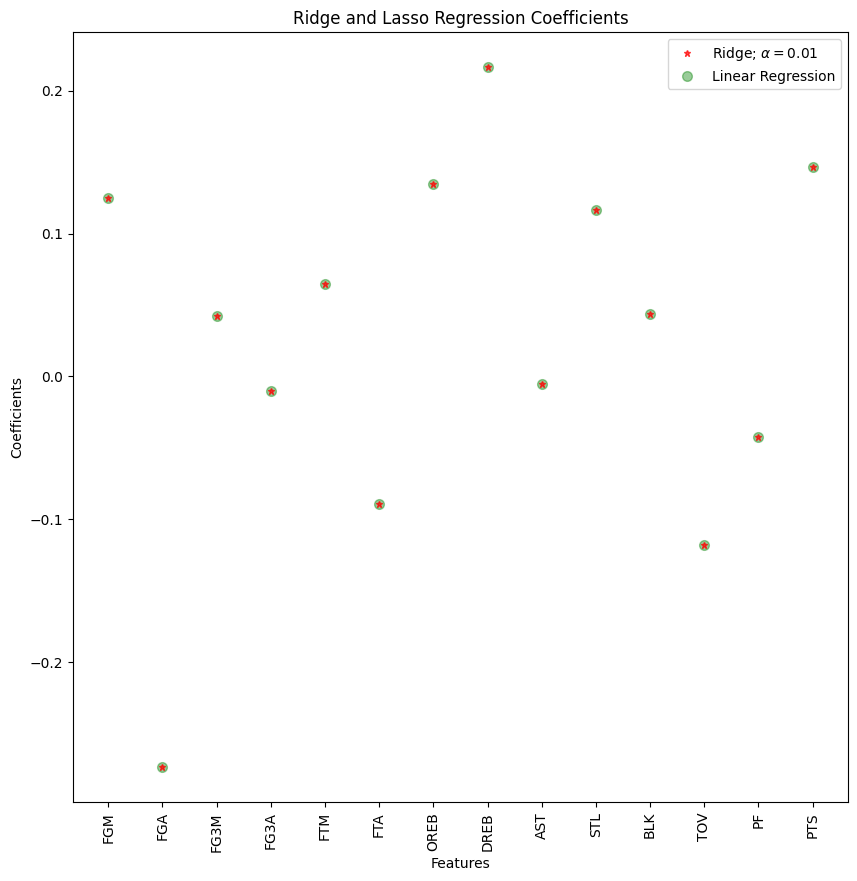

In [ ]:
"""
Plotting the Ridge and Lasso Regression Coefficients
"""
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,linearReg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title("Ridge and Lasso Regression Coefficients")
plt.legend()
plt.show()

In [ ]:
#Looking at the lasso values
lasso_cv = LassoCV(alphas = [0.0001, 0.005, 0.001, 0.01, 0.1, 1, 10],random_state=0).fit(X_train_scaled,y_train)

#looking at the test score for the updated values
print("Lasso CV Regression Score", lasso_cv.score(X_test_scaled,y_test))
print(lasso_cv.alpha_)
print(lasso_cv.coef_)

Lasso CV Regression Score 0.5267577660712777
0.001
[ 0.01483308 -0.26753163  0.00098666 -0.00801647 -0.         -0.08166674
  0.13008919  0.21390241 -0.0018423   0.11414362  0.04317074 -0.11434581
 -0.04249979  0.27466962]


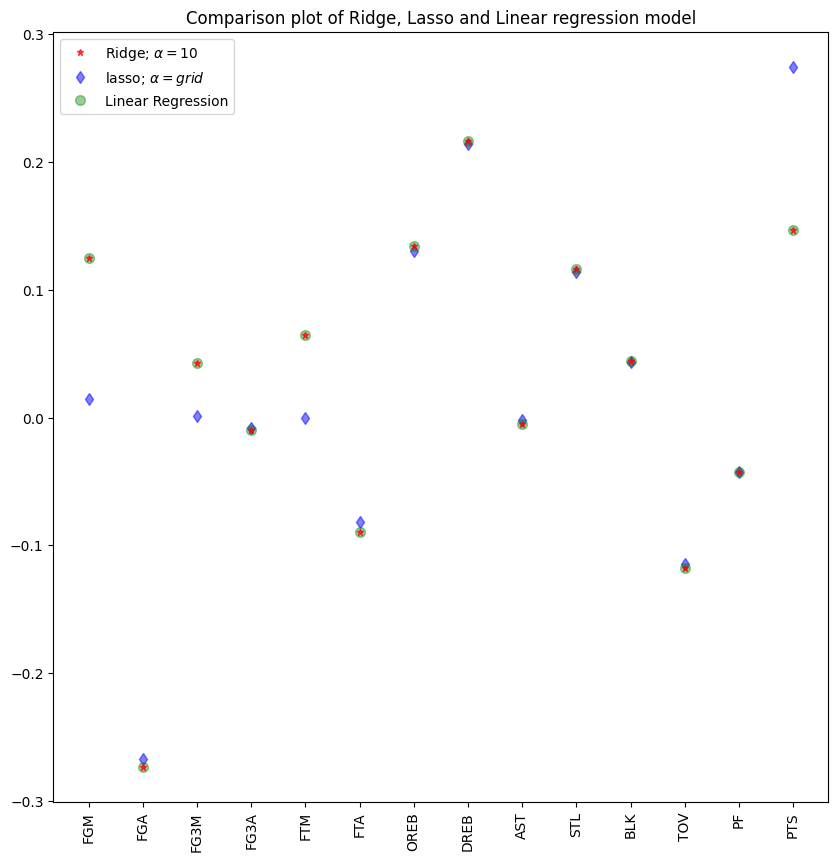

In [ ]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,linearReg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()

In [ ]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.0005, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is 0.53350653875248
The test score for ridge model is 0.5267401590484844


## Analysis

### ShotClockDetail

I want to include a graph that shows the projected values on the field using the machine learning model that we defined.

Here are some options that we could utilize:

MPL Basketball:
https://opensource.pysport.org/project/mplbasketball

In [ ]:
pip install mplbasketball

Used 1 line of code from FastBreakStats around the shotchartdetail.

In [ ]:
from nba_api.stats.endpoints import ShotChartDetail
from nba_api.stats.endpoints import CommonPlayerInfo

def get_locations_current_game(player_name):
  player = players.find_players_by_full_name(player_name)
  player_id = player[0]['id']

  gamefiinder = leaguegamefinder.LeagueGameFinder(player_id_nullable=player_id)
  games = gamefiinder.get_data_frames()[0]

  #getting the latest
  latest_game_id = games.iloc[0]['GAME_ID']
  #finding the current team that the player is on
  player_information = commonplayerinfo.CommonPlayerInfo(player_id_nullable=player_id)
  data = player_information.get_data_frames()[0]
  team_id = data.iloc[0]['TEAM_ID']

  #tracking the player information
  player_tracking = shotchartdetail.ShotChartDetail(game_id_nullable=latest_game_id,player_id_nullable = player_id, team_id_nullable=team_id)
  data = player_tracking.get_data_frames()[0]

  location_data = data[['PLAYER_ID','LOCX', 'LOCY']]
  return(location_data)

In [ ]:
  player = players.find_players_by_full_name("Lebron James")
  player_id = player[0]['id']

  gamefiinder = leaguegamefinder.LeagueGameFinder(player_id_nullable=player_id)
  games = gamefiinder.get_data_frames()[0]

  #getting the latest
  latest_game_id = games.iloc[0]['GAME_ID']
  #display the player tracking stats
  player_tracking = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=latest_game_id)
  data = player_tracking.get_data_frames()[0]

  data.columns

I made the decision to look at the movements of the team as opposed to the individual movements of each player during the particular game. There could be adjustments made so that you can think about

In [ ]:
def get_locations_throughout_current_game(player_name):
  get_box_score_player_track("LeBron James")



In [ ]:
from mplbasketball import Court

court = Court(court_type="nba",origin="center", units = "ft")
fig,ax = court.draw(showaxis=True)

In [ ]:
locations = get_locations_current_game("LeBron James")

x = locations['LOCX']
y = locations['LOCY']
ax.scatter(x, y, color='red')

Here is a list